# Multiple tube generation experiment processing

![element_number=40, length_mean=40, radius_mean=5, measurement_resolution=20](id26en40lm40rm5mr20.png)
element_number=40, length_mean=40, radius_mean=5, measurement_resolution=20
![element_number=40, length_mean=40, radius_mean=5, measurement_resolution=10](id26en40lm40rm5mr10.png)
element_number=40, length_mean=40, radius_mean=5, measurement_resolution=10

In [231]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [232]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os.path as op
from pprint import pprint as pp
import scipy.stats
import seaborn as sns


In [233]:
datapath = "~/teigen_data/output_rows.csv"

In [234]:
plotkw ={
    "figsize": [9, 6], 
    # "fontsize": 14
}

In [235]:
df = pd.read_csv(op.expanduser(datapath))
pp(df.keys())

# df

Index([u'appearance noise_preview', u'appearance show_aposteriori_surface',
       u'appearance skip_volume_generation', u'area volume [mm^3]',
       u'areasampling areasize_mm', u'areasampling areasize_px',
       u'areasampling voxelsize_mm', u'count []', u'datetime', u'filepattern',
       u'generator_id', u'generators Continuous tubes element_number',
       u'generators Continuous tubes fixed_radius_distribution',
       u'generators Continuous tubes normal_radius_distribution',
       u'generators Continuous tubes radius_distribution_maximum',
       u'generators Continuous tubes radius_distribution_mean',
       u'generators Continuous tubes radius_distribution_minimum',
       u'generators Continuous tubes radius_distribution_standard_deviation',
       u'generators Continuous tubes random_generator_seed',
       u'generators Continuous tubes uniform_radius_distribution',
       u'generators Gensei n_objects',
       u'generators Unconnected tubes allow_overlap',
       u'gene

In [236]:
df

,appearance noise_preview,appearance show_aposteriori_surface,appearance skip_volume_generation,area volume [mm^3],areasampling areasize_mm,areasampling areasize_px,areasampling voxelsize_mm,count [],datetime,filepattern,...,postprocessing noise_lambda_start,postprocessing noise_lambda_stop,postprocessing noise_mean,postprocessing noise_rng_seed,postprocessing output_dtype,required_teigen_version,surface [mm^2],surface d. [mm^-1],volume [mm^3],volume d. []
0,False,True,True,1100000.0,"[110.0, 100.0, 100.0]","[110, 100, 100]","[1.0, 1.0, 1.0]",1.0,2017-05-18T00:32:26.142663,~/teigen_data/{seriesn:03d}/data{:06d}.jpg,...,0.1,3.0,30.0,0,uint8,NaN,5026.548246,0.004570,33510.321638,0.030464
1,False,True,True,1100000.0,"[110.0, 100.0, 100.0]","[110, 100, 100]","[1.0, 1.0, 1.0]",1.0,2017-05-18T00:32:27.994418,~/teigen_data/{seriesn:03d}/data{:06d}.jpg,...,0.1,3.0,30.0,0,uint8,NaN,5026.548246,0.004570,33510.321638,0.030464
2,False,True,True,1100000.0,"[110.0, 100.0, 100.0]","[110, 100, 100]","[1.0, 1.0, 1.0]",1.0,2017-05-18T00:32:28.733111,~/teigen_data/{seriesn:03d}/data{:06d}.jpg,...,0.1,3.0,30.0,0,uint8,NaN,5026.548246,0.004570,33510.321638,0.030464
3,False,True,True,1100000.0,"[110.0, 100.0, 100.0]","[110, 100, 100]","[1.0, 1.0, 1.0]",1.0,2017-05-18T00:32:29.633913,~/teigen_data/{seriesn:03d}/data{:06d}.jpg,...,0.1,3.0,30.0,0,uint8,NaN,5026.548246,0.004570,33510.321638,0.030464
4,False,True,True,1100000.0,"[110.0, 100.0, 100.0]","[110, 100, 100]","[1.0, 1.0, 1.0]",1.0,2017-05-18T00:32:30.446273,~/teigen_data/{seriesn:03d}/data{:06d}.jpg,...,0.1,3.0,30.0,0,uint8,NaN,5026.548246,0.004570,33510.321638,0.030464
5,False,True,True,1100000.0,"[110.0, 100.0, 100.0]","[110, 100, 100]","[1.0, 1.0, 1.0]",1.0,2017-05-18T00:32:31.224153,~/teigen_data/{seriesn:03d}/data{:06d}.jpg,...,0.1,3.0,30.0,0,uint8,NaN,5026.548246,0.004570,33510.321638,0.030464
6,False,True,True,1100000.0,"[110.0, 100.0, 100.0]","[110, 100, 100]","[1.0, 1.0, 1.0]",1.0,2017-05-18T00:32:31.962429,~/teigen_data/{seriesn:03d}/data{:06d}.jpg,...,0.1,3.0,30.0,0,uint8,NaN,5026.548246,0.004570,33510.321638,0.030464
7,False,True,True,1100000.0,"[110.0, 100.0, 100.0]","[110, 100, 100]","[1.0, 1.0, 1.0]",1.0,2017-05-18T00:32:32.764776,~/teigen_data/{seriesn:03d}/data{:06d}.jpg,...,0.1,3.0,30.0,0,uint8,NaN,5026.548246,0.004570,33510.321638,0.030464
8,False,True,True,1100000.0,"[110.0, 100.0, 100.0]","[110, 100, 100]","[1.0, 1.0, 1.0]",1.0,2017-05-18T00:32:33.448844,~/teigen_data/{seriesn:03d}/data{:06d}.jpg,...,0.1,3.0,30.0,0,uint8,NaN,5026.548246,0.004570,33510.321638,0.030464
9,False,True,True,1100000.0,"[110.0, 100.0, 100.0]","[110, 100, 100]","[1.0, 1.0, 1.0]",1.0,2017-05-18T00:32:34.175474,~/teigen_data/{seriesn:03d}/data{:06d}.jpg,...,0.1,3.0,30.0,0,uint8,NaN,5026.548246,0.004570,33510.321638,0.030464


In [250]:

df = pd.read_csv(op.expanduser(datapath))
df["surface error [mm^2]"] = df["numeric surface [mm^2]"] - df["surface [mm^2]"]
df["surface error [%]"] = df["surface error [mm^2]"] / df["surface [mm^2]"] * 100
df["volume error [mm^3]"] = df["numeric volume [mm^3]"] - df["volume [mm^3]"]
df["volume error [%]"] = df["volume error [mm^3]"] / df["volume [mm^3]"] * 100
df["measurement_resolution"] = df["postprocessing measurement_resolution"]
df["length_distribution_mean"] = df["generators Unconnected tubes length_distribution_mean"]


# Numeric measurement precision (element_numer = 20, length_mean = 15)

In [238]:

dfs = df[
    df["output note"] == "resolution sphere"
    # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
]
dfsp = dfs[["surface error [%]", "volume error [%]", "measurement_resolution"]].sort_values(
    "measurement_resolution")
dfsp.plot(
    x="measurement_resolution", **plotkw)
dfsp

TypeError: Empty 'DataFrame': no numeric data to plot

In [ ]:

sns.factorplot("measurement_resolution", "surface error [%]", data=dfs)#.set(ylim=(0, 1))

In [ ]:

sns.lmplot("measurement_resolution", "surface error [%]", data=dfs)#.set(ylim=(0, 1))

In [ ]:
dfs = df[
    df["output note"] == "resolution tube"
    # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
]
dfsp = dfs[["surface error [%]", "volume error [%]", "measurement_resolution"]].sort_values(
    "measurement_resolution")
dfsp.plot(
    x="measurement_resolution", **plotkw)
# dfsp

In [ ]:
# df = pd.read_csv(op.expanduser(datapath))
# df["surface error [mm^2]"] = np.abs(df["numeric surface [mm^2]"] - df["surface [mm^2]"])
# df["surface error [%]"] = df["surface error [mm^2]"] / df["surface [mm^2]"] * 100
# df["volume error [mm^3]"] = np.abs(df["numeric volume [mm^3]"] - df["volume [mm^3]"])
# df["volume error [%]"] = df["volume error [mm^3]"] / df["volume [mm^3]"] * 100
# df["measurement_resolution"] = df["postprocessing measurement_resolution"]
dfs = df[
    df["output note"] == "tube length"
    # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
]
dfsp = dfs[["surface error [%]", "volume error [%]", "length_distribution_mean"]].sort_values(
    "length_distribution_mean")
dfsp.plot(
    x="length_distribution_mean", **plotkw)
dfsp

In [ ]:
import seaborn as sns

In [ ]:
pd.__path__

In [ ]:
pd.__version__

In [ ]:
## element_number = 10, 
df["output note"]

## Compensation methods

### 1 sphere

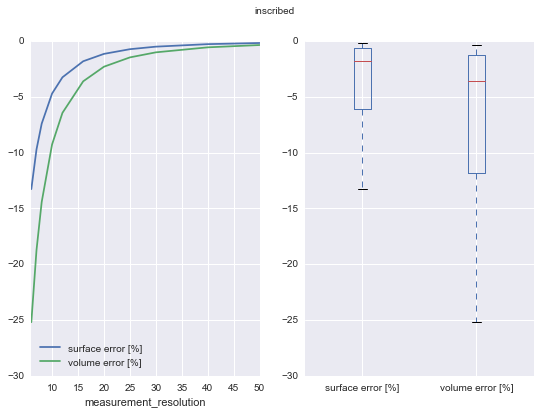

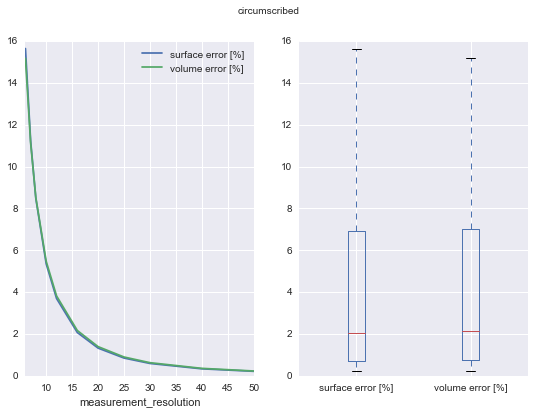

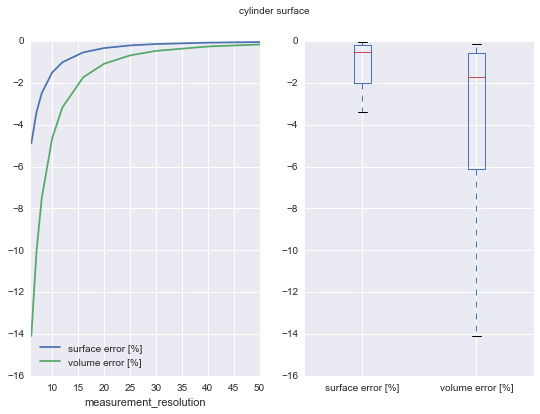

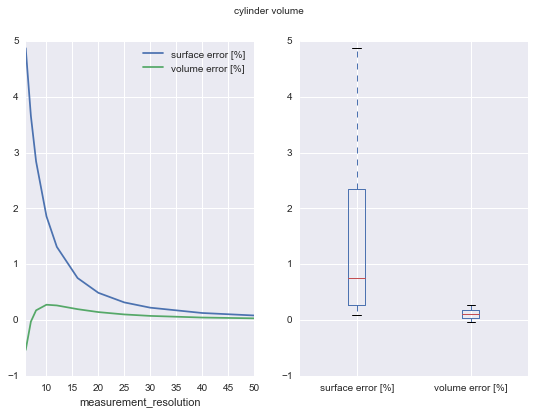

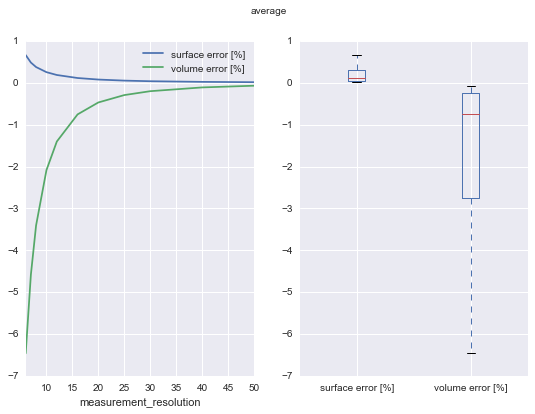

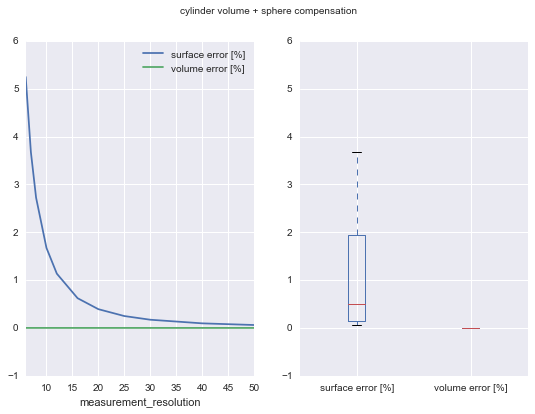

In [253]:
for radius_method in ["inscribed", "circumscribed", "cylinder surface", "cylinder volume", "average", "cylinder volume + sphere compensation"]:
        
    dfs = df[
        df["output note"] == "compensation method 1 sphere " + radius_method
        # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
    ]
    
    dfsp = dfs[["surface error [%]", "volume error [%]", "measurement_resolution"]].sort_values(
        "measurement_resolution")
    
    fig = plt.figure(figsize=[25, 18])
    ax = plt.subplot(121)
    dfsp.plot(
        ax=ax, x="measurement_resolution", **plotkw)
    ax = plt.subplot(122)
    dfsp[["surface error [%]", "volume error [%]"]].plot(
        ax=ax, kind="box", **plotkw)
    plt.suptitle(radius_method)


### 1 tube

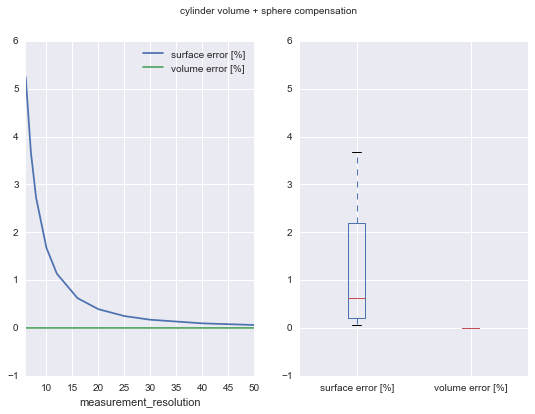

In [252]:
for radius_method in ["cylinder volume + sphere compensation"]:
        
    dfs = df[
        df["output note"] == "compensation method 1 tube " + radius_method
        # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
    ]
    
    dfsp = dfs[["surface error [%]", "volume error [%]", "measurement_resolution"]].sort_values(
        "measurement_resolution")
    
    fig = plt.figure(figsize=[25, 18])
    ax = plt.subplot(121)
    dfsp.plot(
        ax=ax, x="measurement_resolution", **plotkw)
    ax = plt.subplot(122)
    dfsp[["surface error [%]", "volume error [%]"]].plot(
        ax=ax, kind="box", **plotkw)
    plt.suptitle(radius_method)


## 5 tubes

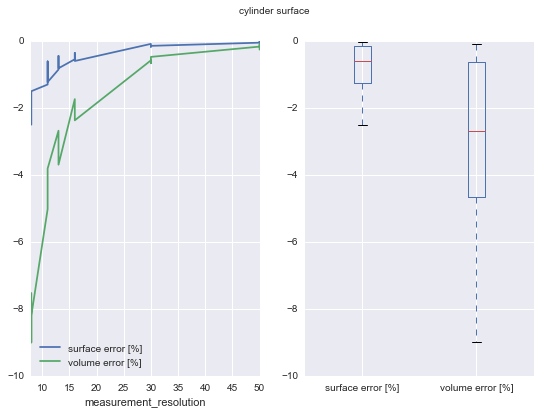

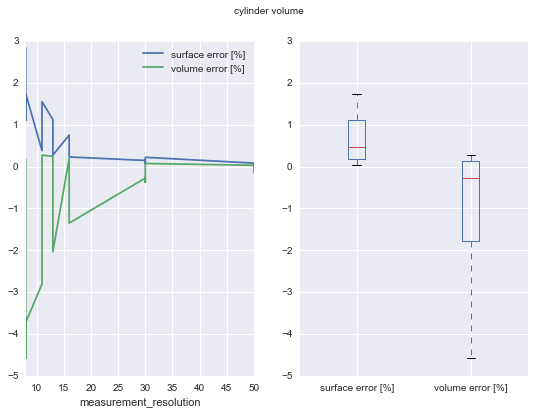

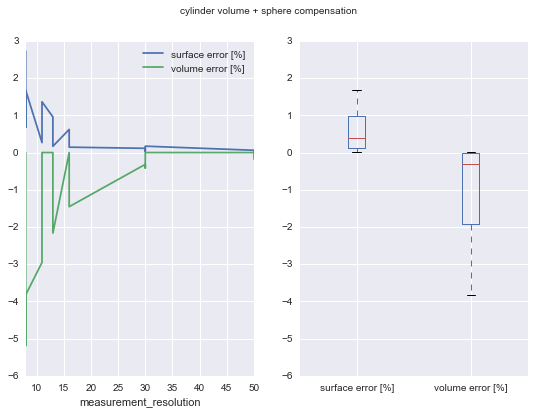

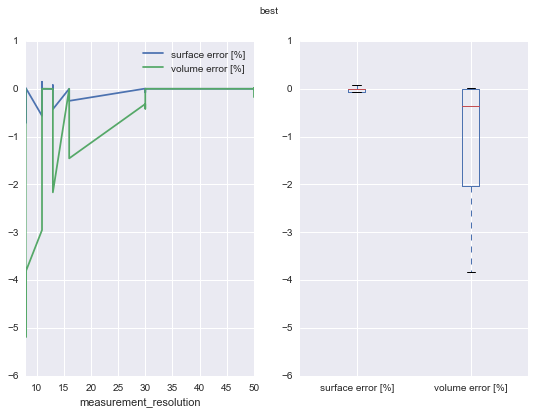

In [254]:
# for radius_method in ["cylinder volume + sphere compensation"]:
for radius_method in ["cylinder surface", "cylinder volume", "cylinder volume + sphere compensation", "best"]:

        
    dfs = df[
        df["output note"] == "compensation method 5 tubes " + radius_method
    ]
    
    dfsp = dfs[["surface error [%]", "volume error [%]", "measurement_resolution"]].sort_values(
        "measurement_resolution")
    
    fig = plt.figure(figsize=[25, 18])
    ax = plt.subplot(121)
    dfsp.plot(
        ax=ax, x="measurement_resolution", **plotkw)
    ax = plt.subplot(122)
    dfsp[["surface error [%]", "volume error [%]"]].plot(
        ax=ax, kind="box", **plotkw)
    plt.suptitle(radius_method)


In [ ]:
for radius_method in ["inscribed", "circumscribed", "cylinder surface", 
                      "cylinder volume", "average", "cylinder volume + sphere compensation"]:
        
    dfs = df[
        df["output note"] == "compensation method " + radius_method
        # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
    ]
    
    dfsp = dfs[["surface error [%]", "volume error [%]", "measurement_resolution"]].sort_values(
        "measurement_resolution")
    
    fig = plt.figure(figsize=[25, 18])
    ax = plt.subplot(121)
    dfsp.plot(
        ax=ax, x="measurement_resolution", **plotkw)
    ax = plt.subplot(122)
    dfsp[["surface error [%]", "volume error [%]"]].plot(
        ax=ax, kind="box", **plotkw)
    plt.suptitle(radius_method)


### Radius estimation

In [ ]:
dfs[["volume [mm^3]"]]

In [ ]:
### Kontrolní výpočet objemu

In [ ]:
v_sphere = (4.0/3.0) * np.pi * 20.0**3
v_sphere

In [ ]:
v_cylinder = np.pi*20.0**2 * 2.6696777
v_cylinder

In [ ]:
v_cylinder + v_sphere


# Numeric and analytic error

## measurement_resolution = 25

In [ ]:
# df = pd.read_csv(op.expanduser(datapath))
# df["surface error [mm^2]"] = df["numeric surface [mm^2]"] - df["surface [mm^2]"]
# df["surface error [%]"] = df["surface error [mm^2]"] / df["surface [mm^2]"] * 100
# df["volume error [mm^3]"] = df["numeric volume [mm^3]"] - df["volume [mm^3]"]
# df["volume error [%]"] = df["volume error [mm^3]"] / df["volume [mm^3]"] * 100
# df["measurement_resolution"] = df["postprocessing measurement_resolution"]
# df["element_number"] = df["generators Unconnected tubes element_number"]
# df["length_distribution_mean"] = df["generators Unconnected tubes radius_distribution_mean"]
# df["radius_distribution_mean"] = df["generators Unconnected tubes length_distribution_mean"]
dfs = df[
    df["output note"] == "compensation method 5 tubes " + "best"
]
dfsp = dfs[["volume [mm^3]", "numeric volume [mm^3]", "surface [mm^2]", "numeric surface [mm^2]", "surface error [%]", "volume error [%]"]]
dfsp

In [ ]:

axp = dfsp[["surface [mm^2]", "numeric surface [mm^2]"]].plot(kind="box", **plotkw)

In [ ]:
axp = dfsp[["volume [mm^3]", "numeric volume [mm^3]"]].plot(kind="box", **plotkw)

In [ ]:
axp = dfsp[["surface error [%]", "volume error [%]"]].plot(kind="box", **plotkw)

In [ ]:
# for radius_method in ["cylinder volume + sphere compensation"]:
for radius_method in ["cylinder surface", "cylinder volume", "cylinder volume + sphere compensation", "best"]:

        
    dfs = df[
        df["output note"] == "compensation method 5 tubes " + radius_method
    ]
    
    dfsp = dfs[["surface error [%]", "volume error [%]", "measurement_resolution"]].sort_values(
        "measurement_resolution")
    
    fig = plt.figure(figsize=[25, 18])
    ax = plt.subplot(121)
    dfsp.plot(
        ax=ax, x="measurement_resolution", **plotkw)
    ax = plt.subplot(122)
    dfsp[["surface error [%]", "volume error [%]"]].plot(
        ax=ax, kind="box", **plotkw)
    plt.suptitle(radius_method)


In [ ]:
nsu = dfsp["numeric surface [mm^2]"]
su = dfsp["surface [mm^2]"]
nsux = np.ones([len(nsu)])
sux = np.zeros([len(su)])
y = np.concatenate([nsu, su])
x = np.concatenate([nsux,sux])
#plot(, np.concatenate([nsux,sux]))
plt.plot(x, y)

In [ ]:
y.shape

In [ ]:
x.shape

In [ ]:
dfsp.describe()

# Statistics

inscribed : 
surface (w/s): 
WilcoxonResult(statistic=0.0, pvalue=0.00028961940975555264) SpearmanrResult(correlation=0.99999999999999978, pvalue=1.4544144561226516e-116) 
volume (w/s): 
WilcoxonResult(statistic=0.0, pvalue=0.00028961940975555264) SpearmanrResult(correlation=0.99999999999999978, pvalue=1.4544144561226516e-116)
average : 
surface (w/s): 
WilcoxonResult(statistic=20.0, pvalue=0.007431713591810528) SpearmanrResult(correlation=0.99999999999999978, pvalue=1.4544144561226516e-116) 
volume (w/s): 
WilcoxonResult(statistic=0.0, pvalue=0.00028961940975555264) SpearmanrResult(correlation=0.99999999999999978, pvalue=1.4544144561226516e-116)
best : 
surface (w/s): 
WilcoxonResult(statistic=51.0, pvalue=0.37889625633635371) SpearmanrResult(correlation=1.0, pvalue=0.0) 
volume (w/s): 
WilcoxonResult(statistic=0.0, pvalue=0.00043199086688202514) SpearmanrResult(correlation=1.0, pvalue=0.0)


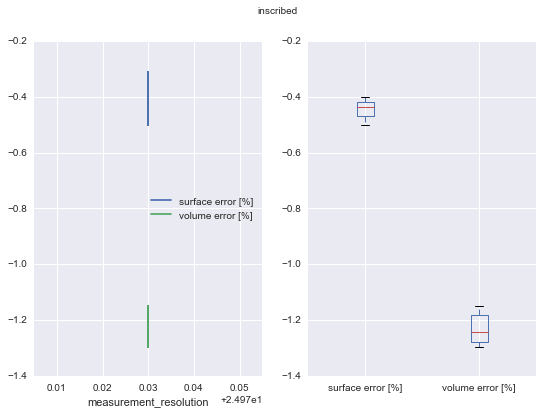

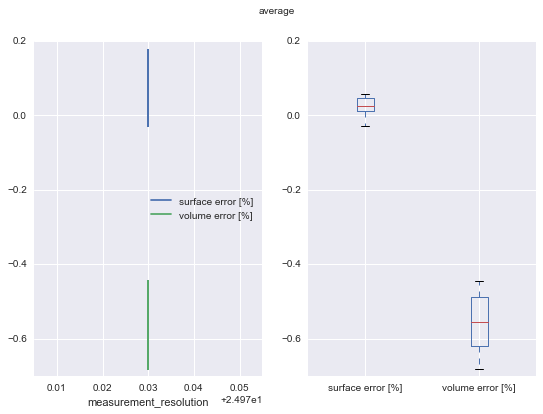

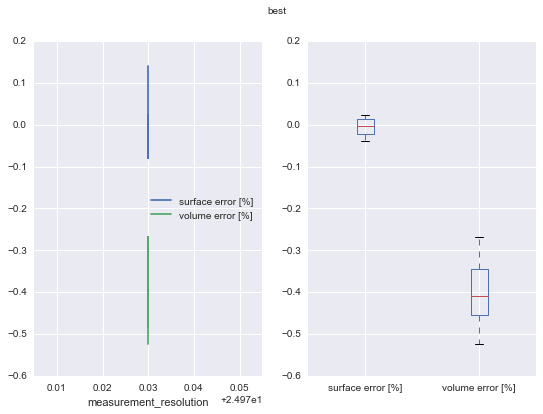

In [251]:
# for radius_method in ["cylinder volume + sphere compensation"]:
for radius_method in [
    "inscribed", 
    # "circumscribed", "cylinder surface", "cylinder volume",
    "average", 
    # "cylinder volume + sphere compensation", 
    "best"]:

        
    dfs = df[
        df["output note"] == "fixed resolution " + radius_method
    ]
    
    dfsp = dfs[["surface error [%]", "volume error [%]", "measurement_resolution"]].sort_values(
        "measurement_resolution")
    
    # wilcoxon - čím větší, tím lepší, alespoň 0.05
    surf_w = scipy.stats.wilcoxon(x=dfs["surface [mm^2]"], y=dfs["numeric surface [mm^2]"], correction=False, zero_method="pratt")
    # spearman čím menší, tím lepší
    surf_s = scipy.stats.spearmanr(dfs["surface [mm^2]"], dfs["numeric surface [mm^2]"])
    
    # wilcoxon - čím větší, tím lepší
    vol_w = scipy.stats.wilcoxon(x=dfs["volume [mm^3]"], y=dfs["numeric volume [mm^3]"], correction=False, zero_method="pratt")
    # spearman čím menší, tím lepší
    vol_s = scipy.stats.spearmanr(dfs["volume [mm^3]"], dfs["numeric volume [mm^3]"])
    
    print radius_method, ": \nsurface (w/s): \n" , surf_w, surf_s, "\nvolume (w/s): \n", vol_w, vol_s
    fig = plt.figure(figsize=[25, 18])
    ax = plt.subplot(121)
    dfsp.plot(
        ax=ax, x="measurement_resolution", **plotkw)
    ax = plt.subplot(122)
    dfsp[["surface error [%]", "volume error [%]"]].plot(
        ax=ax, kind="box", **plotkw)
    plt.suptitle(radius_method)


In [ ]:
dfs

## Surface

In [ ]:
# wilcoxon - čím větší, tím lepší
scipy.stats.wilcoxon(x=dfs["surface [mm^2]"], y=dfs["numeric surface [mm^2]"], correction=False, zero_method="pratt")

In [ ]:
scipy.stats.wilcoxon(dfs["surface error [%]"], correction=False, zero_method="pratt")

In [ ]:
# spearman čím menší, tím lepší
scipy.stats.spearmanr(dfs["surface [mm^2]"], dfs["numeric surface [mm^2]"])

## Volume

In [ ]:
# wilcoxon - čím větší, tím lepší
scipy.stats.wilcoxon(x=dfs["volume [mm^3]"], y=dfs["numeric volume [mm^3]"], correction=False, zero_method="pratt")

In [ ]:
# spearman čím menší, tím lepší
scipy.stats.spearmanr(dfs["volume [mm^3]"], dfs["numeric volume [mm^3]"])

In [ ]:
resolution = 6
radius = 10

alpha = (2*np.pi) / (resolution)
radius_out = radius / np.cos(alpha/2)

radius_out


In [ ]:
np.cos(np.pi/2)